# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

# Kruschke's light blue color
sns.set_palette(["#87ceeb"])
sns.set_context("talk")

In [2]:
df = pd.read_csv("data/TwoGroupIQ.csv")
# Only work with the "Smart Drug" group
df = df[df.Group == "Smart Drug"]

print len(df)
df.head()

63


,Score,Group
0,102,Smart Drug
1,107,Smart Drug
2,92,Smart Drug
3,101,Smart Drug
4,110,Smart Drug


In [3]:
with pm.Model() as model:
    # Priors
    sigma = pm.Uniform("sigma", 0, 100)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    nu = pm.Exponential("nu", 1.0/29)  # Taken from the book
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu, sd=sigma, observed=df.Score)
    # Sample
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000

Optimization terminated successfully.
         Current function value: 302.471536
         Iterations: 29
         Function evaluations: 40

100%|██████████| 10000/10000 [00:59<00:00, 167.90it/s]


         Gradient evaluations: 40


In [4]:
pm.df_summary(trace[burn_in:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,107.239101,2.880902,0.045709,101.738574,112.874086
sigma,20.275739,3.482074,0.130451,13.550749,26.820462
nu,10.970780,13.903396,0.658525,1.105209,36.777573


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d67d490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d916190>]], dtype=object)

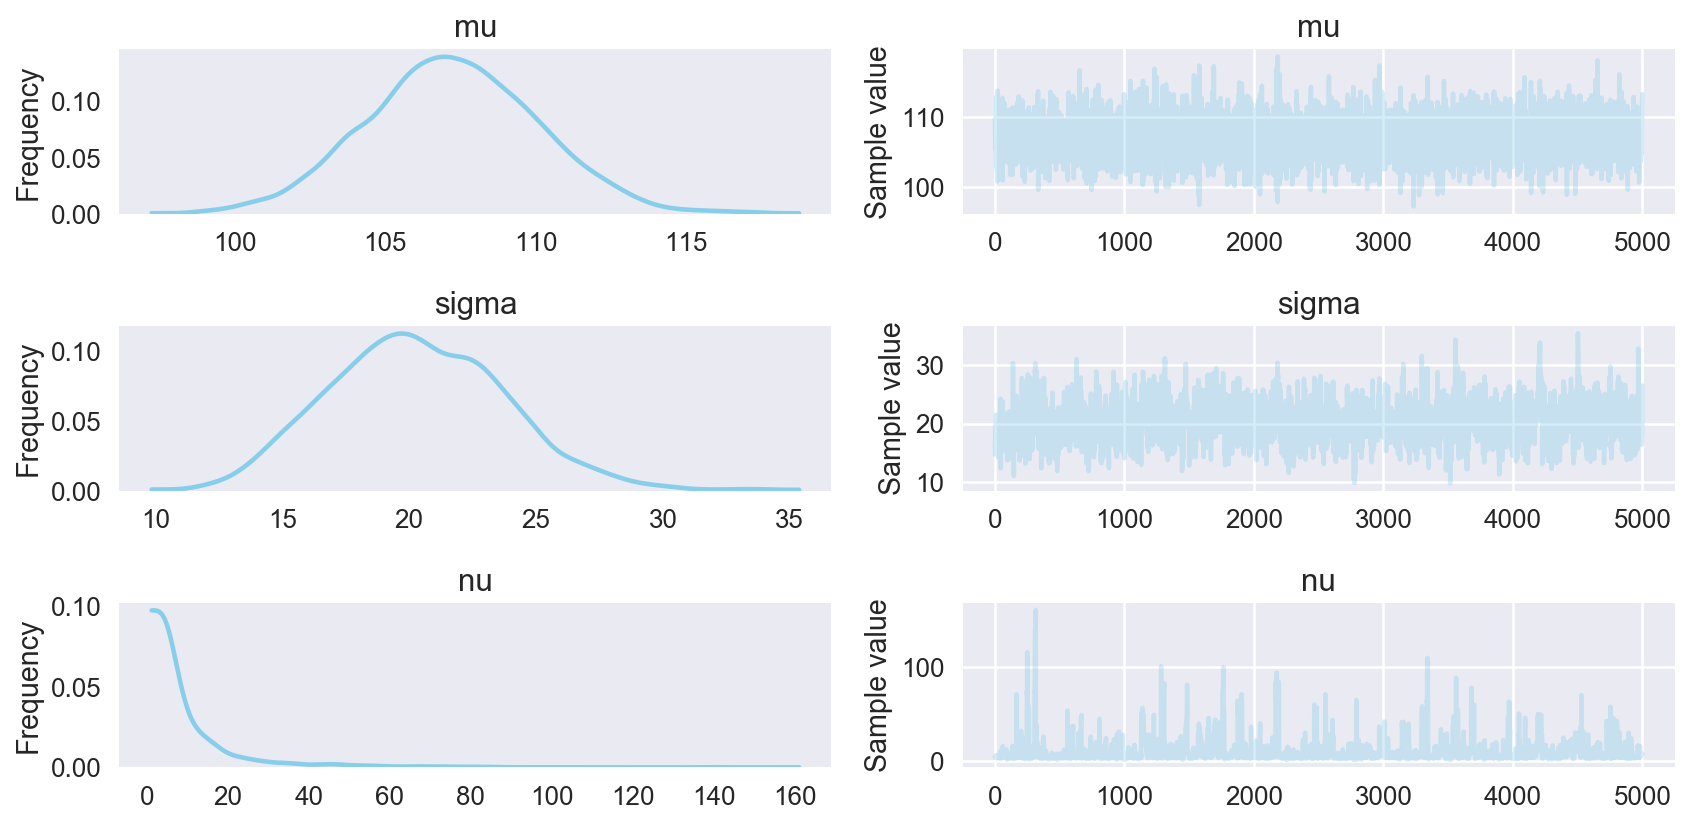

In [5]:
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dbfdb10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1115eead0>], dtype=object)

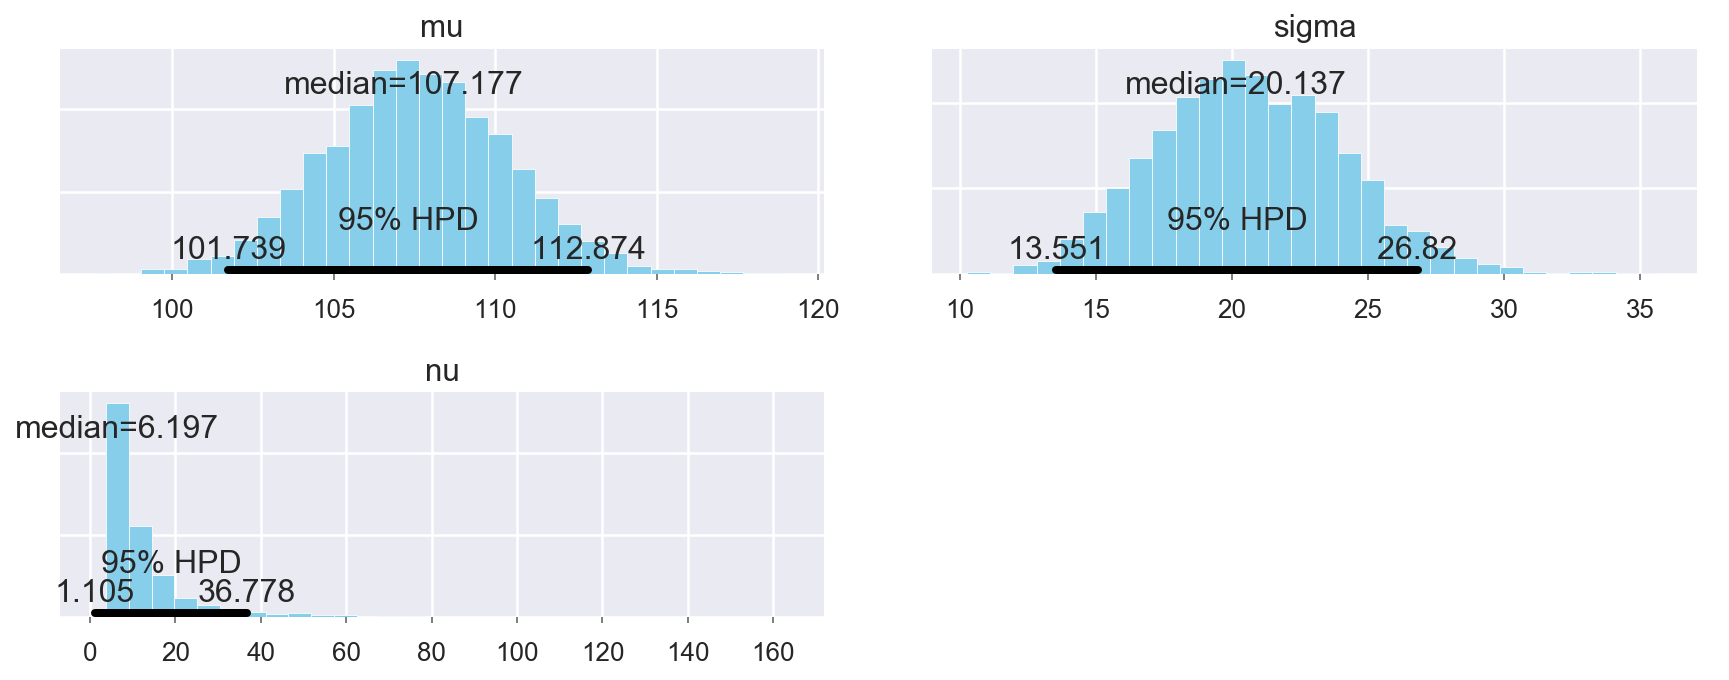

In [6]:
pm.plot_posterior(trace[burn_in:], point_estimate="median")